In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/envs')
sys.path.append('/models')
import envs.viper as vpr
import models.models as models
import models.dqn as dqn

In [3]:
import importlib
importlib.reload(vpr); importlib.reload(models); importlib.reload(dqn)

<module 'models.dqn' from 'h:\\Coding Projects\\Python Projects\\Deep-XIV-Rotation\\models\\dqn.py'>

In [4]:
torch.cuda.empty_cache()

In [5]:
viper_env = vpr.Viper(_sks = 798)

b123


In [6]:
agent = dqn.DQN(viper_env, _max_history=8192)

h:\Coding Projects\Python Projects\Deep-XIV-Rotation\models\models.py:266: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(self.get_positional_embeddings(_his_len + 1, self.hidden_dim)))


Created model transnet_v1 with 15 features and 9 actions.
Model loaded onto cuda:0.
Layer (type:depth-idx)                        Output Shape              Param #
TransformerNetv1                              [196, 9]                  4,929,920
├─Sequential: 1-1                             [196, 8, 640]             --
│    └─Linear: 2-1                            [196, 8, 512]             8,192
│    └─SELU: 2-2                              [196, 8, 512]             --
│    └─Linear: 2-3                            [196, 8, 256]             131,328
│    └─ReLU: 2-4                              [196, 8, 256]             --
│    └─Linear: 2-5                            [196, 8, 256]             65,792
│    └─SELU: 2-6                              [196, 8, 256]             --
│    └─Linear: 2-7                            [196, 8, 256]             65,792
│    └─BatchNorm1d: 2-8                       [196, 8, 256]             16
│    └─ReLU: 2-9                              [196, 8, 256]    

c:\Users\nickb\anaconda3\envs\deepxiv\Lib\site-packages\torch\nn\modules\transformer.py:720: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  return torch._transformer_encoder_layer_fwd(


In [7]:
action_sequence=[1, 3, 6, 8, 0, 2, 5, 0, 0]
agent.env.reset_env()
_sum = 0
for a in action_sequence:
    res = agent.env.step(a, True)
    _sum+=res[0]
    print(f'({res[0]:.2f}, {res[1]:.0f}, {res[2]:.2f})')
print(_sum, _sum / len(action_sequence))

Took action: 1-reaving_fangs @ 0.000
(0.43, 200, 206.95)
Took action: 3-swiftskins_sting @ 2.450
(0.61, 300, 287.60)
Took action: 6-hindsting_strike @ 4.900
(0.83, 400, 382.94)
Took action: 8-death_rattle @ 5.600
(0.61, 280, 291.98)
Took action: 0-steel_fangs @ 6.980
(0.64, 300, 303.14)
Took action: 2-hunters_sting @ 9.060
(0.62, 300, 296.12)
Took action: 5-flanksbane_fang @ 11.140
(1.18, 550, 543.75)
Took action: 0-steel_fangs @ 13.220
(0.44, 220, 222.40)
Took action: 0-steel_fangs @ 13.920
(-0.23, 0, 0.00)
5.126222222222222 0.5695802469135802


In [8]:
agent.reset_environment()

In [11]:
agent.train(gamma=0.80, num_epochs=200, session_limit=100)

Epoch 0 Loss: 5.13e-04 E_0: 0.18 E_1: 0.23 G: 0.80 Rewards: 5.7 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 420
Epoch 1 Loss: 2.11e-04 E_0: 0.18 E_1: 0.22 G: 0.80 Rewards: 5.9 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 822
Epoch 2 Loss: 1.57e-04 E_0: 0.18 E_1: 0.22 G: 0.80 Rewards: -7.5 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 768
Epoch 3 Loss: 1.50e-04 E_0: 0.19 E_1: 0.22 G: 0.80 Rewards: 1.8 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 420
Epoch 4 Loss: 1.54e-04 E_0: 0.19 E_1: 0.22 G: 0.80 Rewards: -1.9 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 582
Epoch 5 Loss: 1.50e-04 E_0: 0.19 E_1: 0.22 G: 0.80 Rewards: -2.9 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 582
Epoch 6 Loss: 1.50e-04 E_0: 0.19 E_1: 0.22 G: 0.80 Rewards: -1.8 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 528
Epoch 7 Loss: 1.45e-04 E_0: 0.19 E_1: 0.22 G: 0.80 Rewards: -2.4 Eval Rewards: -11.6[-0.23], LR: 1.0e-04 SKS: 528
Epoch 8 Loss: 1.45e-04 E_0: 0.19 E_1: 0.21 G: 0.80 Rewards: -11.0 Eval Rewards: -11.6[-0.23

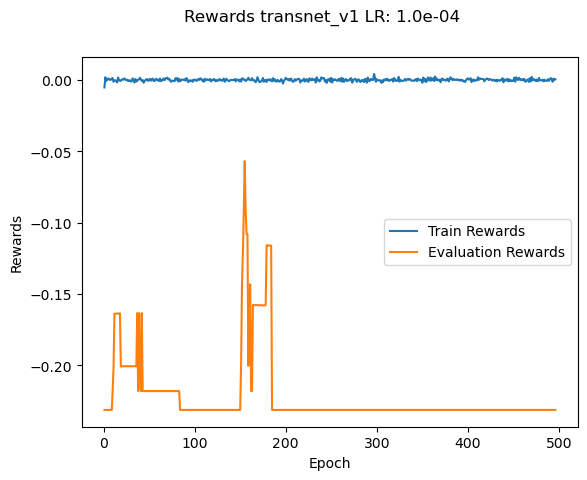

In [12]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle(f'Rewards {agent.model_name} LR: {agent.lr:.1e}')
ax.plot(history_x, history_y)
ax.legend(['Train Rewards', 'Evaluation Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph.png', bbox_inches='tight')
plt.show()

In [9]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_last.pth')

h:\Coding Projects\Python Projects\Deep-XIV-Rotation\models\dqn.py:349: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Checkpoint loaded - Epoch: 296 sks: 822


In [ ]:
viper_env.compute_gcd(2.5, 798, 15)

In [ ]:
# 2.12, 2.11, 2.10, 2.09, 2.08
#[420, 528, 582, 768, 822]
agent.test(num_steps=50, _sks=822)

terraform aws
kubernites
helm?
look into

In [12]:
unenc = ""
for i in range(10000):
    if np.random.random() > 0.5:
        unenc += '1'
    else:
        unenc += '0'
unenc = format(int(unenc, 2), 'b')
print(len(unenc), unenc)

9999 10000010100110011110001101001100110000110110100100010010000110101100101010011000011011100001010110100000010101111100010011001101001111011111011100000000011100100000001101000100001000010011011010001111011001100000000010111110000111011110110111110001100100000011001110011101001011011000111010001001010111100101001010100000011010111010011010111101011010100001110001101110011010110101101111000010010110101100110111001000101010111111010111000000101000101100111101101001100101010000100101111100001000100000011001111101111100001101000000111110110010101110100001010110100001111011110111000111011011100101111100111110000010011111011001111110111111001110001111101100001001011111000000101010101101110001101111101000101110001010000110111010010000011111110000011110100110001000111101011111011001110001110100110010101111011011001000111101000100010001101000001000010101001001111011100101000000101110001111101000001110101110101101000111001111000100111011001100101111001101100110100010011010001111110100110011010

In [13]:
import zlib
enc_ = zlib.compress(unenc.encode())
print(len(enc_), enc_)
print(len(enc_.hex()))
print(len(enc_)+len(enc_.hex()))

1668 b'x\x9cm\x94\x8b\x95\x1c7\x0c\x04S\x02\xf2O\xce\x965]]\xe0Zz:\xed\xcd\x90@\x7fw\xe7\xcf\x9f\xfd\xf7\xef\xec\x7f\xff\xfe\xfc\xfc\xf3\x91\x07\xf3\xfd\xfe\xf7\xd1\x7f\x87\x87\x87\x7f\xcf\xf4\xfewt3\xf4\xef\xad\xfe\xf6\x8dgvVn~N\xfe\xecf\x0fx\xbe\xb5\xc3\x84<\xfe{7\x08\xb2n\x83\xe3\x9b?+\x04\x1d\xfe\xd1\xfe\xce\xcd\x07z\x87\x07\xb3E\x1f\xa9fu}\xb9\xca\xb1\x0f\x1b\xfb\xab\x8b^f\xe4t-\xba\x04\xe0V\xb8,\xaac\x9c\xaf?\x06\xb7W\x86y)\xaf\xdf\x8a\x10r\x96\xd9u\x93\xabp[\x81\xfef2z\xf6\x0c\xd5\xe2\xad8y\xfd\xa2F\x81\xd1\xb6\x9c\x8f\xcf\xe8\x91C\xb8\xbb+\x18ui\x94\x9b\x8b\xad\xb6K\x01"\xa1[\x15\x14\xe9\xaa\x13\x9c\xd1D\xa9,_\x82\xbe\xfc\xcc\x8aV\x11y\x83\x88\x18Q\xa1\xd1\xa75\xcd\xe6\xac\x92(\xe85<Qr3\x16\xdd\xdb"\xfd\xd6\xc6?aD\x89+\x05lT\xb9`+\xa7\x12V1\x15\xeb\x13\x8c\xe1\x84b\x8c\xda\x92\x83z\x85\xf7]\x8b\xda\x8a\x06C\x05\x00H\x11B\xec\xc2\xe8\x16Ab\xb9\xcem\x85\xd2L\xaeH\xe5h\xa3L(1r\x13v\xecP\x80\x8e$kj\'\x1aNfm?\r<\x1f3\x15\xb1)O\xbf8\xbc\xea\xf7\xd3\x95\xfd[P\xd1L\xf7F\xaa:\x83\xab\xf

In [9]:
zlib.decompress(enc_.fromhex(enc_.hex()))

b'11010001010001010000101010111101101101100111100100111011000011011111010101111101110000100001110001101011100001010111010110001000000000101011101110001111011010001100101011111101100101110001111011000000100101011100100000001010101011110000000100011000101111000111011010100101010000000001101111110011101111111110001110011100011001011011000011111000101000010100000010110001101001101100111010011011100010001110110111100100100101001100100010010000010010011000001010011001101100101101000100011001001101110100010010111110100110111100110110001011101000001011101011000011010111001000001111010000100101011110110111111100001001000100011001110101000110111010001111000001011111010001001100110110001001101111011000010110000100000001110110000101100011011101001100101011100010101010010000101000111110010001000010100110000101101000110100110011010001111000110010011011010100100011111111100100110001000100010011001010000101101110001010100100101010101001110100000001011001000101111010011111110000101110111100110111110110